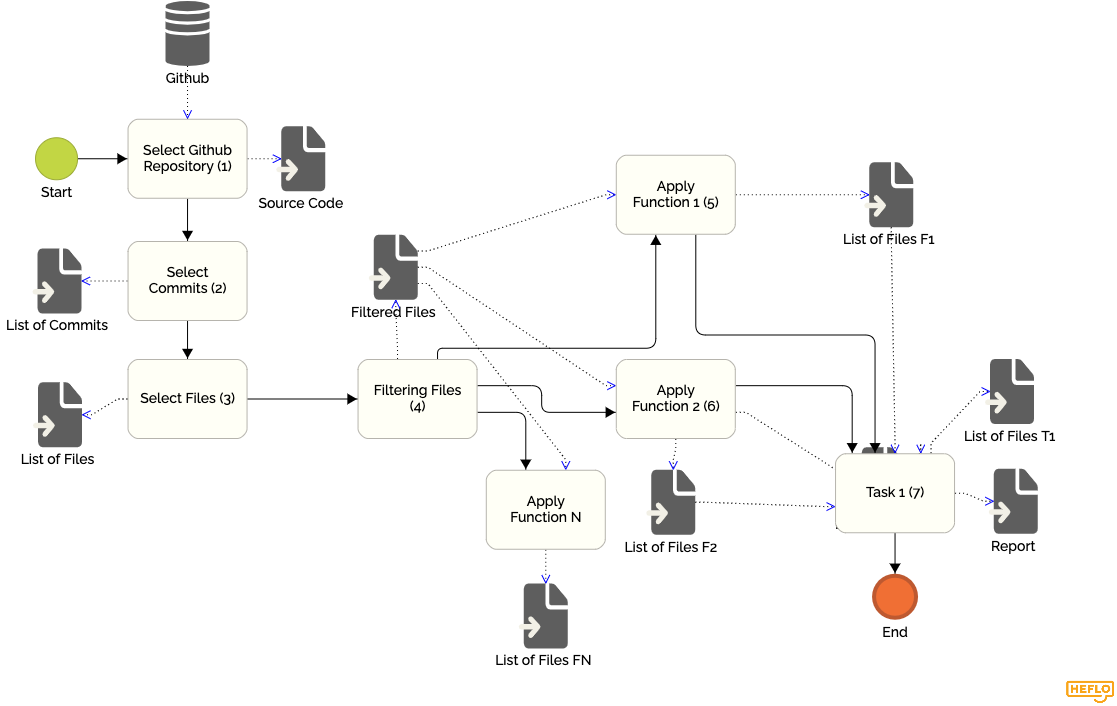

# Install modules

In [ ]:
# Instala modulos que serão usados
# https://pydriller.readthedocs.io/en/latest/
!pip install pydriller

# Install SO packages

In [ ]:
#For google colab
!sudo apt install tree

# Imports

In [6]:
from pydriller import Repository
import pandas as pd

# 1. Select Github repository



In [ ]:
!git clone https://github.com/armandossrecife/promocity.git

In [72]:
# Define uma variável para representar o repositório que será trabalhado
repositorio = "promocity"

In [ ]:
# Clona o repositorio treinamento para acessar as libs proprietárias
!git clone https://github.com/mining-software-repositories/treinamento.git

In [ ]:
# Exibe a estrutura do repositório promocity em uma árvore texto
!cd promocity && tree

# Directory and File Analyzer

In [75]:
# Lista todos os arquivos e diretorios com os paths completos
list_of_files_and_directories = !cd promocity && tree -i -f

In [77]:
# Substitui o . por promocity/
list_of_files_and_directories_updated = [each.replace('./', 'promocity/') for each in list_of_files_and_directories]

In [80]:
# Escolhe o diretorio do source java
# Lista apenas arquivos e diretorios do src/main/java
list_of_files_and_directories_src = []

for item in list_of_files_and_directories_updated:
  if 'src' in item:
    if 'src/main/java/' in item:
      list_of_files_and_directories_src.append(item)

In [44]:
# Cria um arquivo contendo a quantidade de LOC por arquivo
!find promocity -name *.java | xargs wc -l > locarquivosjava.txt
list_locs_of_files = !cat locarquivosjava.txt

# Cria uma lista com elementos que representam o LOC e o arquivo
# (Loc, arquivo)
list_locs_of_files_updated = []
for each in list_locs_of_files:
  elementos = each.split(' ') 
  item = elementos[-2], elementos[-1]
  list_locs_of_files_updated.append(item)

# Commits and Files Analyzer

In [82]:
# Importa funcoes pre-definidas para manipular repositorios usando o Pydriller
import treinamento.utils.msr as msr

## 2. Select commits

In [ ]:
# Lista todos os commits de um repositorio
list_commits_promocity = msr.list_all_commits(repositorio)
list_commits_promocity

## 3. Select files from commits

In [ ]:
# Lista todos os arquivos modificados em cada commit
dict_modified_files_promocity = msr.list_all_modified_files_in_commits(repositorio)
dict_modified_files_promocity

In [ ]:
# Lista todos os commits e seus arquivos modificados
for commit, lista_files in dict_modified_files_promocity.items(): 
  print(commit, [file.filename for file in lista_files])

In [ ]:
# 5. Lista a frequência dos arquivos nos commits
dict_frequency_files_commits = msr.get_files_frequency_in_commits(repositorio)
dict_frequency_files_commits

In [ ]:
# 6. Lista a Quantidade de Linhas de Código Modificadas em cada Arquivo
dict_lines_modified_in_files = msr.get_number_of_lines_of_code_changes_in_commits(repositorio)
dict_lines_modified_in_files

## 4. Select only java files


In [ ]:
dict_java_frequency_commits = {}
for file, frequency in dict_frequency_files_commits.items():
  if '.java' in file:
    dict_java_frequency_commits[file] = frequency

dict_java_frequency_commits

In [ ]:
dict_java_lines_modified = {}
for file, lines_modified in dict_lines_modified_in_files.items():
  if '.java' in file:
    dict_java_lines_modified[file] = lines_modified

dict_java_lines_modified

# 7. Task Analyzer

Faz a análise entre Frequência de Commits dos Arquivos e Linhas Modificadas de cada arquivo ao longo do tempo

In [ ]:
# Converte o dicionário dict_java_frequency_commits em um dataframe
df_java_frequency_commits = pd.DataFrame(dict_java_frequency_commits.items(), columns=['File', 'Frequency'])
df_java_frequency_commits

In [ ]:
# Converte o dicionário dict_java_lines_modified em um dataframe
df_java_lines_modified = pd.DataFrame(dict_java_lines_modified.items(), columns=['File', 'lines_modified'])
df_java_lines_modified

In [91]:
# Faz o merge das informações para criar um dataframe contendo o arquivo, a frequência de Commits e Linhas Modificadas de cada arquivo ao longo do tempo
df_fc_ml = df_java_frequency_commits[['File', 'Frequency']]
df_fc_ml['lines_modified'] = df_java_lines_modified['lines_modified']
df_fc_ml

,File,Frequency,lines_modified
0,BackendApplication.java,2,23
1,GenericExceptionMapper.java,1,20
2,JerseyConfiguration.java,6,54
3,UserLocationMonitoring.java,11,316
4,BookController.java,1,100
...,...,...,...
60,TrackService.java,1,31
61,ManipuladorDatas.java,1,27
62,ReportStore.java,1,129
63,ReportUser.java,1,136


# Results

### Mostra um Scatter plot relacionando Linhas Modificadas e Ocorrência dos Arquivos nos commits

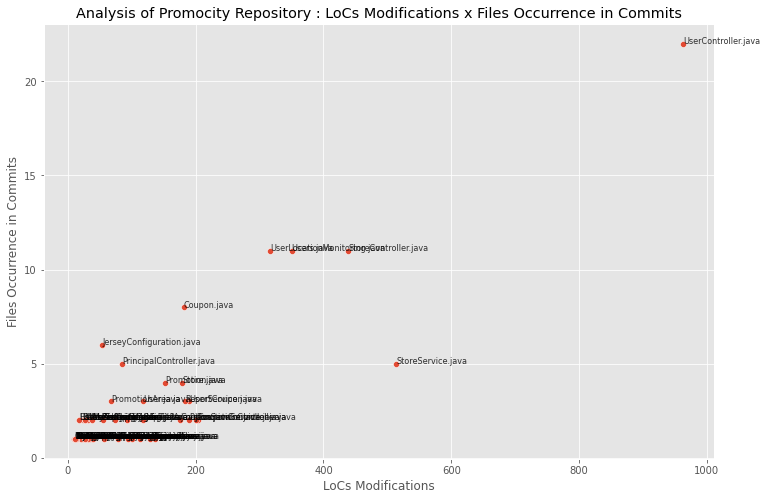

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize=(12,8))
sns.scatterplot(data=df_fc_ml, x='lines_modified', y='Frequency')

abbr={'titulo':'LoCs Modifications x Files Occurrence in Commits', 'lines_modified':'LoCs Modifications', 'Frequency':'Files Occurrence in Commits'}

plt.title(f"Analysis of Promocity Repository : {abbr['lines_modified']} x {abbr['Frequency']}")
plt.xlabel(abbr['lines_modified'])
plt.ylabel(abbr['Frequency'])
          
for i in range(df_fc_ml.shape[0]): 
  plt.text(df_fc_ml.lines_modified[i], y=df_fc_ml.Frequency[i], s=df_fc_ml.File[i], alpha=0.8, fontsize=8)

plt.savefig('scatter_plot_em_fc_1.png')
plt.show()

In [71]:
import plotly.graph_objects as go

#https://plotly.com/python/line-and-scatter/
#https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html
#https://plotly.com/python/creating-and-updating-figures/
#https://plotly.com/python/setting-graph-size/
#https://plotly.com/python/axes/
#https://www.linkedin.com/pulse/complete-introduction-plotly-from-beginner-advanced-pranjall-kumar

# array de complexidade ciclomatica
array_cc = np.random.randint(1, 300, size=300)
# Add traces
fig = go.Figure(data=go.Scatter(
                    x=df_fc_ml.lines_modified, 
                    y=df_fc_ml.Frequency,
                    mode='markers',
                    name='markers',
                    customdata=df_fc_ml.File,
                    hovertext=df_fc_ml.File, 
                    marker=dict(size=8, color=array_cc, colorscale='Blues', showscale=True, colorbar={"title": 'CC'})
                    )
                  )

fig.update_layout({"title_text": "LoC Mofications x Commit Frequency"},     
                  width=1000,
                  height=600
                  )
fig.update_xaxes(
        title_text = "LoC Modifications",
        title_font = {"size": 10}
        )
fig.update_yaxes(
        title_text = "Commit Frequency",
        title_font = {"size": 10}
        )

fig.show()